# Classifying Consumer Finance Complaints into 12 pre-defined classes

The problem is supervised text classification problem, and our goal is to investigate which supervised machine learning methods are best suited to solve it.

Given a new complaint comes in, we want to assign it to one of 12 categories. The classifier makes the assumption that each new complaint is assigned to one and only one category. This is multi-class text classification problem.

## Data Exploration

In [1]:
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


**Input:** Consumer_complaint_narrative
**Output:** product

We will remove missing values in “Consumer complaints narrative” column, and add a column encoding the product as an integer because categorical variables are often better represented by integers than strings.

We also create a couple of dictionaries for future use.

After cleaning up, this is the first five rows of the data we will be working on:

In [2]:
from io import StringIO

In [3]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [4]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [5]:
df['category_id'] = df['Product'].factorize()[0]

In [7]:
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

In [8]:
category_id_df

,Product,category_id
1,Credit reporting,0
2,Consumer Loan,1
12,Debt collection,2
25,Mortgage,3
36,Credit card,4
90,Other financial service,5
124,Bank account or service,6
152,Student loan,7
168,Money transfers,8
538,Payday loan,9


In [9]:
category_to_id = dict(category_id_df.values)

In [10]:
category_to_id

{'Credit reporting': 0,
 'Consumer Loan': 1,
 'Debt collection': 2,
 'Mortgage': 3,
 'Credit card': 4,
 'Other financial service': 5,
 'Bank account or service': 6,
 'Student loan': 7,
 'Money transfers': 8,
 'Payday loan': 9,
 'Prepaid card': 10,
 'Money transfer, virtual currency, or money service': 11,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Checking or savings account': 13,
 'Vehicle loan or lease': 14,
 'Credit card or prepaid card': 15,
 'Virtual currency': 16,
 'Payday loan, title loan, or personal loan': 17}

In [11]:
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [12]:
id_to_category

{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card',
 16: 'Virtual currency',
 17: 'Payday loan, title loan, or personal loan'}

In [13]:
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [14]:
import matplotlib.pyplot as plt

In [15]:
fig = plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

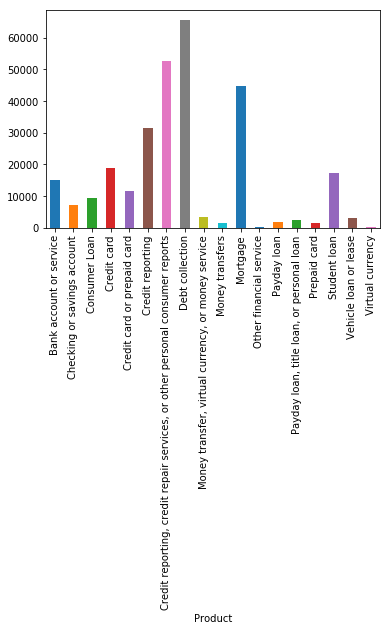

In [16]:
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)

Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored.

For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

## Text Representation

BoW: Frequency of words is taken into consideration, but the order in which they occur is ignored.

Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives:

1. sublinear_df is set to True to use a logarithmic form for frequency.
2. min_df is the minimum numbers of documents a word must be present in to be kept.
3. norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
4. ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
5. stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [31]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative)
labels = df.category_id
features.shape

(286983, 575023)

In [32]:
from sklearn.feature_selection import chi2
import numpy as np

In [33]:
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. overdraft
. deposit
  . Most correlated bigrams:
. direct deposit
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. car
. vehicle
  . Most correlated bigrams:
. car loan
. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. equifax
. experian
  . Most correlated bigrams:
. verify accounts
. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries
. equifax
  . Most correlated bigrams:
. report understanding
. m

## Multi-Class Classifier: Features and Design

- To train supervised classifiers, we first transformed the “Consumer complaint narrative” into a vector of numbers. We explored vector representations such as TF-IDF weighted vectors.
- After having this vector representations of the text we can train supervised classifiers to train unseen “Consumer complaint narrative” and predict the “product” on which they fall.

### Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)

In [38]:
text_clf = Pipeline([('vect', CountVectorizer()),
...                      ('tfidf', TfidfTransformer()),
...                      ('clf', MultinomialNB()),
... ])

In [43]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [44]:
predicted = text_clf.predict(X_test)

In [45]:
np.mean(predicted == y_test)

0.5689237030635854

In [47]:
print(text_clf.predict(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]))

['Debt collection']


In [48]:
print(text_clf.predict(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]))

['Credit reporting, credit repair services, or other personal consumer reports']


In [49]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id
12,Debt collection,This company refuses to provide me verificatio...,2


In [50]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id
61,Credit reporting,I am disputing the inaccurate information the ...,0


## Model Selection

- Logistic Regression
- (Multinomial) Naive Bayes
- Linear Support Vector Machine
- Random Forest


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [52]:
from sklearn.model_selection import cross_val_score


In [53]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [54]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

In [55]:
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])